## Udacity Data Analyst Nanodegree

## Project: Investigate a Dataset
*[Based on an open dataset on the Titanic disaster](https://www.kaggle.com/c/titanic/data)*

*by Tia Qin*

*August 2017*

### 1. Background Information
RMS *Titanic* was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

*[Description from Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)*

### 2. Dataset
The dataset contains demographics and passenger information from 891 of the 2,224 passengers and crew on board the *Titanic*. 

*[The dataset can be found here](https://www.kaggle.com/c/titanic/data)*

#### Variable description
* **Survived**: Survival (0 = No, 1 = Yes)
* **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **Sex**: Gender of the passengers
* **Age**: Age of years
* **SibSp**: Number of siblings/spouses aboard the *Titanic*
* **Parch**: Number of parents/children aboard the *Titanic*
* **Ticket**: Ticket number
* **Fare**: Passenger fare
* **Cabin**: Cabin number
* **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

*Note: Pclass is a  proxy for socio-economic status (1st = Upper, 2nd = Middle, 3rd = Lower).*

### 3. Questions for Investigation
Although there were some elements of luck involved in surviving the sinking, it is highly possible that some groups of people were more likely to survive than others. The questions raised for this investigation are:
* Was social status a factor in survival? (Were upper-class passengers more likely to survive?)
* Did women and children have a better chance to survive?
* What was the age distribution in survival?
* Did passengers by themselves or with their families aboard tend to survive?


### 4. Data understanding
The first step is to load and take a look at the data we're working with. It's necessary to have a general picture of the whole dataset and signal any unexpected values before diving into the dataset.
#### 4.1 Import libraries
Python libraries containing the necessary functionalities need to be imported.

In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'ggplot' )
sns.set(color_codes=True)

# Configure visualizations
%matplotlib inline

#### 4.2 Load data
Now that the packages are loaded, we can read the data using read_csv function in Pandas.

In [2]:
# Read titanic csv files as a DataFrame
titanic_df = pd.read_csv('titanic-data.csv', index_col=0)

In [3]:
# Get the first 5 rows of the dataset to inspect
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get the last 5 rows of the dataset to inspect
titanic_df.tail() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


*Note*: By looking at the first and last five rows of the dataset, it is found that some of the age values and cabin numbers are missing. These null values need to be handled properly when being investigated.

#### 4.3 Statistical summaries
Now let's take a look at some key information about the variables.

In [5]:
# Get detailed information of the dataset
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


*Note*: 
It is important to understand the data types of our variables. By observing the dataset, we can conclude that there're several different data types in our dataset, which are as follows:
* Categorical
 * Nominal: Survived, Sex, Embarked
 * Ordinal: Pclass
* Numerical
 * Continous: Age, Fare
 * Discrete: SibSp, Parch
* Alphanumeric
 * Ticket
 * Cabin

Also, It can be seen that there are 177 out of 891 missing values in Age, 687 out of 891 missing values in Cabin numbers and 2 missing values in Port of embarkation.

In [6]:
# Get descriptive statistics from the numeric series
titanic_df.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Note*: By looking at the descriptive statistics, we can notice that:
* Around 38% of the 891 passengers survived
* In terms of passenger class, the first quartile, median and third quartile are 2, 3 and 3, respectively, indicating that the majority of passengers (more than 75%) were in second class or third class 
* The oldest passenger on board was 80 years old
* Most passengers (more than 75%) did not travel with parents or children
* Fares varied significantly across the groups

In [7]:
# Get descriptive statistics from the object series
titanic_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


*Note*: It can be observed that:
* No passengers had identical names
* Nearly 65% of the passengers were male
* Ticket numbers and Cabin numbers were not unique
* Most passengers embarked at Southampton

#### 4.4 Suggestions on data analysis
* Name and Ticket features can be dropped from our analysis as they may not correlate with survival
* Cabin numbers can be dropped from our dataset as it is highly incomplete
* It is suggested to create a family feature that is based on the summation of Parch and SibSp
* It is suggested to drop the null values in Age

### 5. Data Wrangling
#### 5.1 Dropping values
Since our questions of interest are not related to Ticket Numbers, Cabin Numbers and Passenger Names, and these data are either highly incomplete or non-correlated with survival, we will drop these data to speed up our process.

In [8]:
# Drop Name, Ticket and Cabin values from columns
titanic_df.drop('Name', axis=1, inplace=True)
titanic_df.drop('Ticket',axis=1, inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)
# Get the first 5 rows of the dataset to inspect
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


#### 5.2 Creating new features
In this section, a new feature called 'Family' is created. The numeric values of this feature is based upon the summation of SibSp and Parch.

In [9]:
# Create new dataframe from titanic_df
titanic_fam_df = titanic_df.copy()
# Calculate the family size
family_size = titanic_df['SibSp'] + titanic_df['Parch'] + 1 
titanic_fam_df['Family'] = family_size
# Get the first 5 rows of the dataset to inspect
titanic_fam_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2
2,1,1,female,38.0,1,0,71.2833,C,2
3,1,3,female,26.0,0,0,7.9250,S,1
4,1,1,female,35.0,1,0,53.1000,S,2
5,0,3,male,35.0,0,0,8.0500,S,1


In [10]:
# Drop SibSp and Parch values from columns
titanic_fam_df.drop('SibSp', axis=1, inplace=True)
titanic_fam_df.drop('Parch',axis=1, inplace=True)
# Get the first 5 rows of the new dataset to inspect
titanic_fam_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,2
2,1,1,female,38.0,71.2833,C,2
3,1,3,female,26.0,7.9250,S,1
4,1,1,female,35.0,53.1000,S,2
5,0,3,male,35.0,8.0500,S,1


### 6. Data Analysis
#### 6.1 Passenger class
##### 6.1.1 Overall survival rate in each class
First, let's take a look of the overall survival rate of each class.

In [11]:
# Group data by Pclass and return the arverage survival rate for each class
grouped_Pclass_Srvl = titanic_fam_df.groupby('Pclass', as_index=False)['Survived'].mean().sort_values(by=['Survived'], ascending=False)
grouped_Pclass_Srvl.head()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


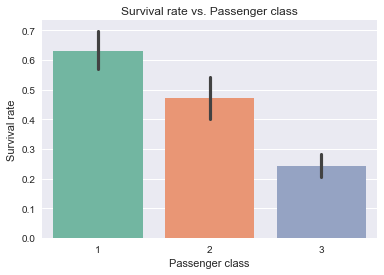

In [12]:
# Create a barplot to visualize the relationship between Pclass and survival rate
g = sns.barplot(x='Pclass', y='Survived', data=titanic_fam_df, palette="Set2")
# Fix axis label and title
g.set(xlabel='Passenger class', ylabel='Survival rate')
plt.title('Survival rate vs. Passenger class')

*Note*: It can be observed that, compared to middle class and lower class, passengers in upper class were more likely to survive. As the plot shows, more than 60% upper-class passengers survived the disaster. On the other hand, there were no more than 25% lower-class passengers survived.

To dive deeper into the dataset, let's take a look at the distribution of passengers in each class in terms of their gender and age, as well as their family sizes.

##### 6.1.2 Gender distribution in each class

In [13]:
# Group data by Pclass and Sex and return the count for each group
grouped_Pclass_Sex = titanic_fam_df.groupby(['Pclass','Sex'], as_index=False)['Sex'].size()

print(grouped_Pclass_Sex)

# Define a function that calculate sex ratio for each class
def sex_ratio(df, pclass):   
    """
    Take dataframe and pclass as inputs and return sex ratio (male/female) for each class.
    """
    number_of_male = df.groupby(['Pclass', 'Sex'], as_index=False).size()[pclass, 'male'].astype('float')
    number_of_female = df.groupby(['Pclass', 'Sex'], as_index=False).size()[pclass, 'female'].astype('float')
    ratio = (number_of_male / number_of_female).round(2)
    
    return ratio

print('-----------------------------')
print('Sex ratio in Class 1 is: {}'.format(sex_ratio(titanic_fam_df, 1)))
print('Sex ratio in Class 2 is: {}'.format(sex_ratio(titanic_fam_df, 2)))
print('Sex ratio in Class 3 is: {}'.format(sex_ratio(titanic_fam_df, 3)))

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64
-----------------------------
Sex ratio in Class 1 is: 1.3
Sex ratio in Class 2 is: 1.42
Sex ratio in Class 3 is: 2.41


*Note*: As can be seen, the sex ratio for the first, second and third class are 1.3, 1.42 and 2.41 respectively.

##### 6.1.3 Age distribution in each class

In [14]:
# Group data by Pclass and Sex and return average age for each group
grouped_Pclass_Age = titanic_fam_df.groupby(['Pclass','Sex'], as_index=False)['Age'].mean().sort_values(by='Age', ascending=False)

grouped_Pclass_Age

,Pclass,Sex,Age
1,1,male,41.281386
0,1,female,34.611765
3,2,male,30.740707
2,2,female,28.722973
5,3,male,26.507589
4,3,female,21.750000


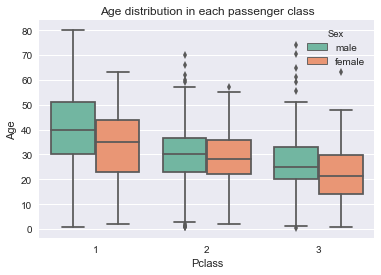

In [15]:
# Visualize age distrubution in each class using box plot
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_fam_df, palette='Set2')
plt.title('Age distribution in each passenger class')

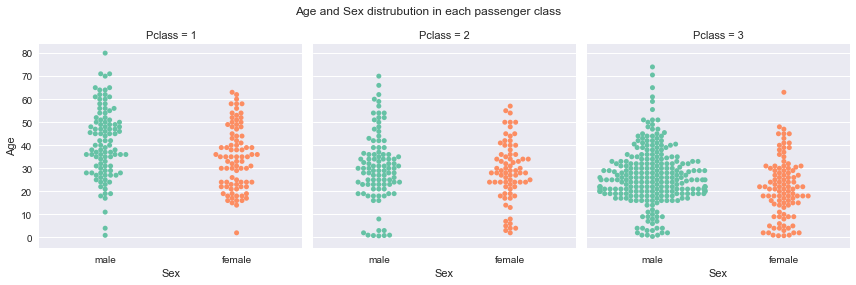

In [16]:
# Create a swarm plot that shows distribution of passengers by age and sex in each class
g = sns.factorplot(kind='swarm', x='Sex', y='Age', col='Pclass', data=titanic_fam_df, palette='Set2')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age and Sex distrubution in each passenger class') 

*Note*: As can be seen from the table, together with the box plot and swarm plot, third class men were significantly more than third class women. And the majority of men in the third class were aged from 20 to 35, with an average age of 26.5. In the second class, men were slightly more than women, and the average age of both men and women were higher than the third class. Compared to second and third class, older passengers were aboard in the first class, with men at an average of 41.3 and women at 34.6.

##### 6.1.4 Family size distribution in each class
Next, let's take a quick look at the family size distribution in each class.

In [17]:
grouped_Pclass_Family = titanic_fam_df.groupby(['Pclass'], as_index=False)['Family'].mean().sort_values(by='Family', ascending=False)
grouped_Pclass_Family

,Pclass,Family
2,3,2.008147
1,2,1.782609
0,1,1.773148


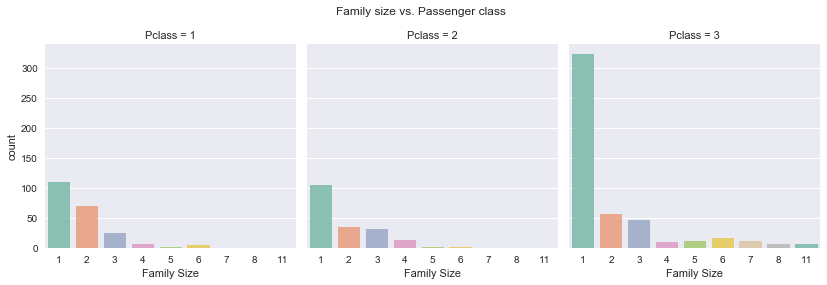

In [18]:
# Create a set of histograms that show the distribution of family sizes in each class
g = sns.factorplot(x='Family', col='Pclass', data=titanic_fam_df, kind='count', palette='Set2', size=4, alpha=.8, aspect=.95)
g.set(xlabel='Family Size')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Family size vs. Passenger class')

*Note*: Average family sizes were 2, 1.78 and 1.77 for the third, second and first class, respectively. 

#### 6.2 Survival rate of women and children
In this section, our focus is on if women and children had a better chance to survive this disaster.
##### 6.2.1 Women

In [19]:
# Group data by Pclass and Sex and return average survival rate for each group
grouped_Pclass_Sex_srvl = titanic_fam_df.groupby(['Pclass','Sex'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

grouped_Pclass_Sex_srvl

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


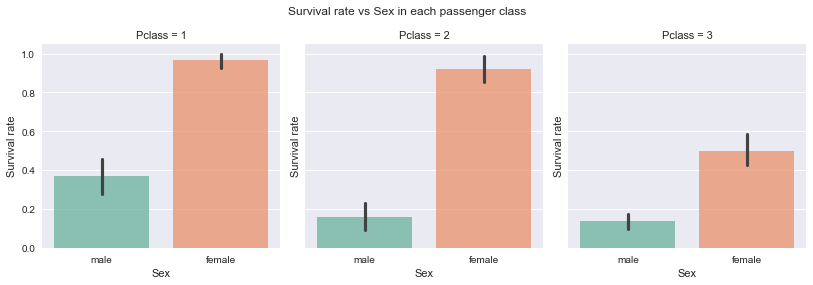

In [20]:
# Visualize survival rate by Sex and Passenger class
g = sns.factorplot(x='Sex', y='Survived',col='Pclass', data=titanic_fam_df, kind='bar', palette='Set2', size=4, alpha=.8, aspect=.95)
g.set(ylabel='Survival rate')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate vs Sex in each passenger class')


*Note*: As the plot indicates, regardless of passenger class, women had better chances to survive than men. The survival rate of women in the first, second and third class were 0.97, 0.92 and 0.5, respectively. On the contrary, the survival rate of men in these three classes were 0.37, 0.16 and 0.14, respectively. Therefore, we can conclude that women were given preferences to board the lifeboats when the ship started to sink. Overall, women in the first class had the best chance to survive while men in the third class had the lowest chance to survive.

##### 6.2.2 Children
Next, we will perform analysis based upon available age data and see if children were more likely to survive. Before that, let's drop the null values and group age values into age bands. 

In [21]:
# Create a copy dataframe from titanic_fam_df
titanic_fam_age_df = titanic_fam_df.copy()

# Drop null values from age column
titanic_fam_age_df.dropna(axis=0, inplace=True)

# Print the first 10 rows of the dataframe to check if the null values has been dropped properly
titanic_fam_age_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,2
2,1,1,female,38.0,71.2833,C,2
3,1,3,female,26.0,7.9250,S,1
4,1,1,female,35.0,53.1000,S,2
5,0,3,male,35.0,8.0500,S,1
7,0,1,male,54.0,51.8625,S,1
8,0,3,male,2.0,21.0750,S,5
9,1,3,female,27.0,11.1333,S,3
10,1,2,female,14.0,30.0708,C,2


In [22]:
# Create age bins
age_bins = [0, 11, 17, 25, 65, 80]

# Divide passengers into 5 different groups
group_names = ['Child', 'Youth', 'Young Adult', 'Adult', 'Senior']

# Cut dataframs based on age bins and lebels
titanic_fam_age_df['Age_group'] = pd.cut(titanic_fam_age_df['Age'], age_bins, labels=group_names)

# Get the first 5 rows of the new dataset to inspect
titanic_fam_age_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Age_group
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,2,Young Adult
2,1,1,female,38.0,71.2833,C,2,Adult
3,1,3,female,26.0,7.9250,S,1,Adult
4,1,1,female,35.0,53.1000,S,2,Adult
5,0,3,male,35.0,8.0500,S,1,Adult


In [23]:
# Frequency count for different groups
pd.value_counts(titanic_fam_age_df['Age_group'])

Adult          403
Young Adult    188
Child           68
Youth           45
Senior           8
Name: Age_group, dtype: int64

*Note*: Based on available age data, we can see that there were 403 adults, 188 young adults, 68 children, 45 youths and 8 senior on board.

In [24]:
# Group data by Pclass and Age Group and return average survival rate for each group
grouped_Pclass_AgeGroup_srvl = titanic_fam_age_df.groupby(['Pclass','Age_group'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

grouped_Pclass_AgeGroup_srvl

,Pclass,Age_group,Survived
4,1,Youth,1.000000
6,2,Child,1.000000
1,1,Child,0.750000
3,1,Young Adult,0.733333
9,2,Youth,0.666667
0,1,Adult,0.623188
5,2,Adult,0.424528
8,2,Young Adult,0.404762
11,3,Child,0.404255
14,3,Youth,0.322581


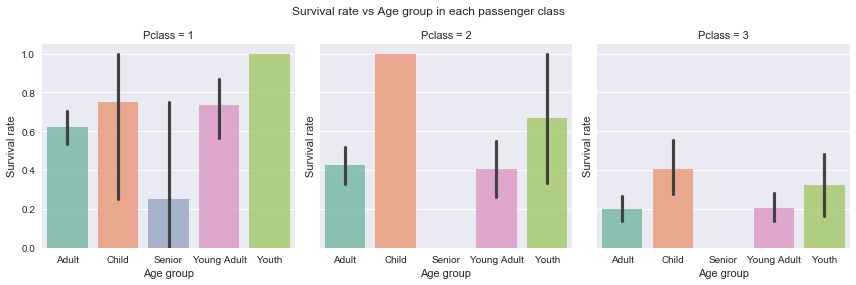

In [25]:
# Create a set of histograms that show the survival rate of different age groups in each class
g = sns.factorplot(data=titanic_fam_age_df, x='Age_group', y='Survived', col='Pclass', kind='bar', palette="Set2", alpha=.8)
g.set(xlabel='Age group', ylabel='Survival rate')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate vs Age group in each passenger class')

*Note*: From the plot, we can observe that regardless of passenger class, children and youth had a greater survival rate compared to other groups. It is worth mentioning that the survival rates of youth in the first class and children in the second class were 100%.

#### 6.3 Age distribution

In [26]:
# Find the youngest survived passenger 
youngest_to_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 1]['Age'].min()

# Find the oldest survived passenger
oldest_to_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 1]['Age'].max()

# Find the mean age of survived passenger

mean_age_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 1]['Age'].mean()

# Find the mean age of non-survived passenger
mean_age_not_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 0]['Age'].mean()

print('-----------------------------------------------')
print('Age of the youngest survived passenger is: {}'.format(youngest_to_survive))
print('Age of the oldest survived passenger is: {}'.format(oldest_to_survive))
print('The average age of survived passenger is: {}'.format(mean_age_survive))
print('The average age of non-survived passenger is: {}'.format(mean_age_not_survive))

-----------------------------------------------
Age of the youngest survived passenger is: 0.42
Age of the oldest survived passenger is: 80.0
The average age of survived passenger is: 28.19329861111111
The average age of non-survived passenger is: 30.62617924528302


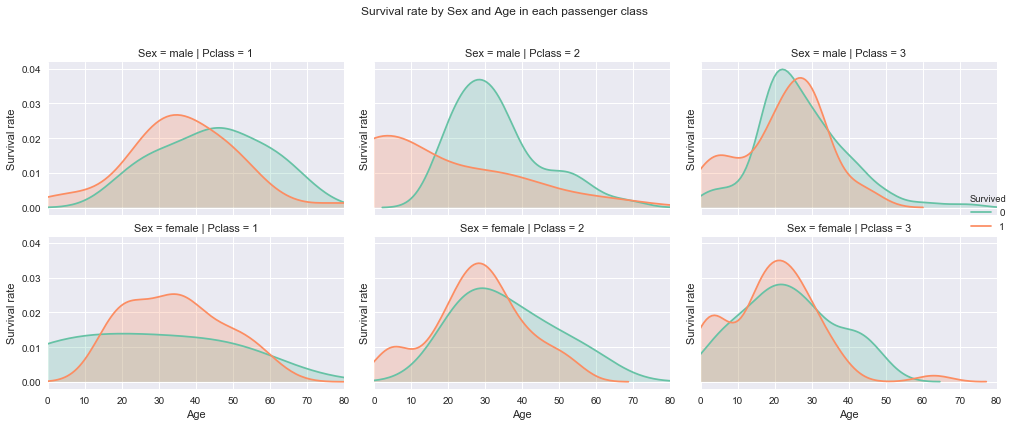

In [27]:
# Plot distributions of Age of passangers who survived or did not survive
g = sns.FacetGrid(titanic_fam_age_df, hue='Survived', row='Sex', col = 'Pclass', aspect=1.5, palette='Set2')
g.map(sns.kdeplot, 'Age', shade= True)

# Fix axis, labels and layout
g.set(xlim=(0, titanic_fam_age_df['Age'].max()))
g.set(ylabel='Survival rate')
g.add_legend()
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate by Sex and Age in each passenger class')

*Note*: As can be seen from the 6 plots above, 3 of them provide bimodal distribution. In the third class, children and young adults had a better chance to survive regardless of sex. Same stories happen to female passengers in the second class. When it comes to male passengers in the second class, it seems that boys with age 0-10 tend to survive. In the first class, female passengers with age from 20-40 were more likely to survive and male passengers with age from 30-40 had a greater survival rate.

#### 6.4 Family size
We already investigated the distribution of family sizes in three passenger classes. Let's take a closer look at how they are related to survival rate.

In [28]:
# Group data by Pclass and Family Size and return the count for each group
grouped_Pclass_Family_count = titanic_fam_age_df.groupby(['Pclass','Family'], as_index=False).size()

grouped_Pclass_Family_count

Pclass  Family
1       1          84
        2          63
        3          24
        4           7
        5           2
        6           4
2       1          93
        2          34
        3          31
        4          13
        5           1
        6           1
3       1         225
        2          42
        3          38
        4           7
        5           8
        6          17
        7          12
        8           6
dtype: int64

In [29]:
# Group data by Pclass and Family Size and return average survival rate for each group
grouped_Pclass_Family_srvl = titanic_fam_age_df.groupby(['Pclass','Family'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)
grouped_Pclass_Family_srvl

,Pclass,Family,Survived
10,2,5,1.000000
4,1,5,1.000000
11,2,6,1.000000
15,3,4,0.857143
9,2,4,0.769231
2,1,3,0.750000
3,1,4,0.714286
1,1,2,0.698413
8,2,3,0.677419
0,1,1,0.583333


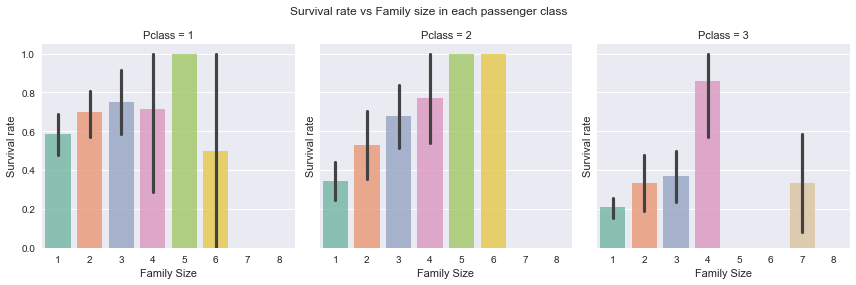

In [30]:
# Create a set of histograms that show the distribution of family sizes in each class
g = sns.factorplot(data=titanic_fam_age_df, x='Family', y='Survived', col='Pclass', kind='bar', palette="Set2", alpha=.8)
g.set(xlabel='Family Size', ylabel='Survival rate')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate vs Family size in each passenger class')

*Note*: Based on the plot, there is not a clear relationship between family size and survival rate. However, we do see a family of 5 and a family of 6 in the second class, as well as two families of 5 in the first class, survived the disaster.

#### 7. Limitations
It is suggested to fill the null age values based on known values using assumed distribution. When trying to guess a passenger's age based on social-economic standing and sex, the student got stuck in looping over dataframes and could not do so. Hence the findings and conclusions solely based upon existing age values may not be comprehensive. This challenge should be addressed in the long run.

#### 8. Conclusion
Our analysis suggests that social-economic status and sex are two major factors in survival. Being a female with upper social-economic standing would provide one the best chance to survive. On the other hand, being a man in the third class would give one very limited chance of survival. In addition, children and youth were more likely to survive compared to other age groups. Family size did not seem to be a dominant factor in survival. 
 